# Problem 4

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.stats import norm

Consider a two-alternative forced choice (2AFC) psychophysical experiment in which a subject sees two stimulus arrays of some intensity on a
trial and must say which one contains the target. (One and only one contains the target.)
Her probability of being correct on a trial is:

                            Pc(I) = 1/2 + 1/2Φ(I; µ, σ)
where Φ(I; µ, σ) is the cumulative distribution function of the Gaussian (normcdf in matlab)
with mean µ and standard deviation σ evaluated at I. The function pc(I) is known as the
psychometric function. (Minor note, somewhat subtle: This setup only makes sense if I is on
a logarithmic scale, e.g., I = k log C, where C is stimulus contrast.

### Part A

Plot two psychometric functions, for {µ, σ} equal to {5, 2} and {4, 3}. (Use I = [1 : 10]).
Describe the difference between these. If you increase µ, how does the curve change?
If you increase σ, how does the curve change? (If you are not sure, make more plots
with different parameter values.) What is the range of pc(I)? Explain why this range is
appropriate.

Normally, the probability ranges between 0 and 1 for a standard cumulative density function. The psychometeric function in this problem scales the function by 1/2 and translates the function by 1/2 meaning the probability function itself ranges from 1/2:1. This function relies on the standard deviation and the mean to generate values. When we adjust these values, the plots vary. Evaluating the limit conditions for mu:

    If we increase mu to a very large value, the curve disappears and essentially flatlines. This is due to the equation used in the normcdf function. Having a large mu makes the exponential term large and negative, which is effectively zero. As a result, the only term that survives in the Pc(I) function is the 1/2. When we decrease mu to a very small value, the curve takes an increasing slope which will then flatline to 1.
    
    Similar effects can be seen by changing the standard deviation. Increasing the standard deviation causes the curve to lose its steep, increasing slope and instead be replaced with nearly a nearly flat line. Decreasing the standard deviation causes the slope to increase in which for the first few intensity values, the line is flat along 1/2. Then, it will rapidly increase to 1 and then flatline again for the remaining intensity values.
    
    

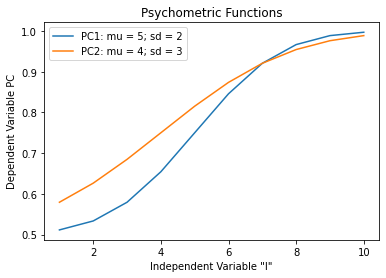

In [9]:
I = np.arange(1,11) # generates a 10 element array from 1:10
mu1 = 5
mu2 = 4
sd1 = 2
sd2 = 3

# calculates the norm.cdf using the intensity values and specifed means and standard deviations
phi1 = norm.cdf(I,mu1,sd1)
phi2 = norm.cdf(I,mu2,sd2)

PC1 = 1/2 + 1/2*phi1 # Psychometric function for mu = 5 and sd = 2
PC2 = 1/2 + 1/2*phi2 # Psychometric function for mu = 4 and sd = 3

plt.plot(I,PC1)
plt.plot(I,PC2)
plt.title('Psychometric Functions')
plt.xlabel('Independent Variable "I"')
plt.ylabel('Dependent Variable PC')
plt.legend(['PC1: mu = 5; sd = 2','PC2: mu = 4; sd = 3'])

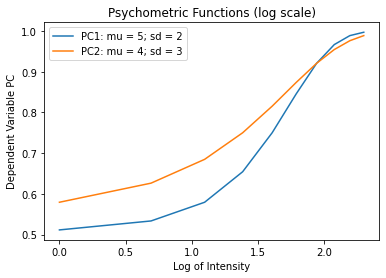

In [10]:
I = np.arange(1,11) # generates a 10 element array from 1:10 on a log scale
mu1 = 5
mu2 = 4
sd1 = 2
sd2 = 3

phi1 = norm.cdf(I,mu1,sd1) # calculates the norm.cdf using the intensity values and specifed means and standard deviations
phi2 = norm.cdf(I,mu2,sd2)

PC1 = 1/2 + 1/2*phi1 # Psychometric function
PC2 = 1/2 + 1/2*phi2

plt.plot(np.log(I),PC1)
plt.plot(np.log(I),PC2)
plt.title('Psychometric Functions (log scale)')
plt.xlabel('Log of Intensity')
plt.ylabel('Dependent Variable PC')
plt.legend(['PC1: mu = 5; sd = 2','PC2: mu = 4; sd = 3'])

In [ ]:
np.log(I)

### Part B

Write a function C=simpsych(mu,sigma,I,T) which takes two vectors (I,T) of the
same length, containing a list of intensities and the number of trials for each intensity,
respectively, simulates draws from pc(I), and returns a vector, C, of the same length as
I and T, which contains the number of trials correct out of T, at each intensity I

In [12]:
def simpsych(mu, sigma, I, T): # Defines the function
    
    phi = norm.cdf(I,mu,sigma) # calculates phi from the cumulative density function
    Pc = 1/2 + 1/2*phi # calculates the psychometric function
    C = np.rint(Pc*T) #By multiplying the probability of correct by the number of trials, we get the number of correct choices
    return C,Pc



### Part C

Illustrate the use of simpsych with T=ones(1,7)*100 and I=1:7 for µ = 4 and σ = 1.
Plot C ./ T vs I (as points) and plot the psychometric function pc(I) (as a curve) on
the same graph.


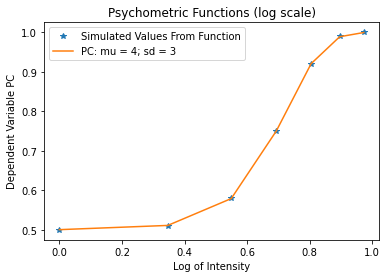

In [21]:
T = np.ones([1,7])*100 # Generates a T vector in which each intensity has 100 trials
I = np.arange(1,8)
mu = 4
sigma = 1

C, Pc = simpsych(mu,sigma,I,T)
C_T = np.divide(C,T)

plt.plot(np.log(I)/2,C_T[0,:],'*')
plt.plot(np.log(I)/2,Pc)
plt.title('Psychometric Functions (log scale)')
plt.xlabel('Log of Intensity')
plt.ylabel('Dependent Variable PC')
plt.legend(['Simulated Values From Function','PC: mu = 4; sd = 3'])

### Part D

Do the same with T=ones(1,7)*10 and plot the results (including the psychometric
function). What is the difference between this and the plot of the previous question?


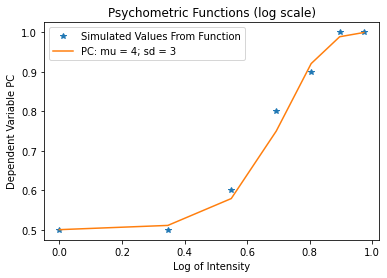

In [20]:
T = np.ones([1,7])*10
I = np.arange(1,8)
mu = 4
sigma = 1

C, Pc = simpsych(mu,sigma,I,T)
C_T = np.divide(C,T)

plt.plot(np.log(I)/2,C_T[0,:],'*')
plt.plot(np.log(I)/2,Pc)
plt.title('Psychometric Functions (log scale)')
plt.xlabel('Log of Intensity')
plt.ylabel('Dependent Variable PC')
plt.legend(['Simulated Values From Function','PC: mu = 4; sd = 3'])

The primary difference between part C and Part D is the number of trials used. Part C used 100 trials for (T) and part D used 10 trials for (T). If we have more trials, we should expect that our simulation becomes more accurate for predicting the correct answer. That is exactly what is demonstrated between both plots. For the 100 trial simulation, we can see an almost perfect matching between Pc and the simulated values from C/T. Conversely, as we decrease the number of trials to 10, we see that the predicted values no longer perfectly match the simulated values and there is much more error compared to what is found in Part C. If we added even more trials (say 1000), our model would likely be even more accurate and if we decreased the number of trials, the model would likely incur even more error.  